In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

# Importing the Dependencies

In [15]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

# Dataset path

In [16]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [17]:
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])


['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [18]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


# Creating Labels for the two class of Images
# with mask --> 0
# without mask --> 1

In [19]:
# create the labels

with_mask_labels = [0]*3725

without_mask_labels = [1]*3828

In [20]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [21]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [22]:
labels = with_mask_labels + without_mask_labels
print("Total labels:", len(labels))
print(labels[0:5])
print(labels[-5:])

Total labels: 7553
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


# Displaying the Images

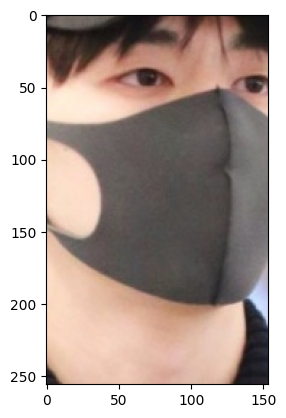

In [23]:
# displaying with mask image

img =Image.open('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1548.jpg')
imgplot = plt.imshow(img)
plt.show()

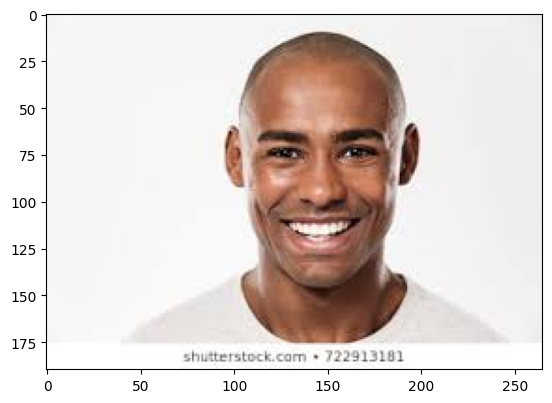

In [24]:
# displaying without mask image
img = Image.open('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1099.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing

**1. Resize the Images**

**2. Convert the images to numpy arrays**

In [25]:
# convert images to numpy arrays and resizing them

with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [26]:

type(data)

list

In [27]:
len(data)

7553

In [28]:
#raw numeric representation of first image
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [30]:
type(data[0])

numpy.ndarray

In [31]:
data[0].shape

(128, 128, 3)

In [33]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [34]:
type(X)

numpy.ndarray

In [35]:
type(Y)

numpy.ndarray

In [36]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [37]:
print(Y)

[0 0 0 ... 1 1 1]


# Train Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [41]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


In [43]:
X_train[0]

array([[[ 28,  27,  23],
        [ 28,  27,  23],
        [ 28,  27,  23],
        ...,
        [ 43,  43,  35],
        [ 43,  43,  35],
        [ 43,  43,  35]],

       [[ 30,  29,  25],
        [ 30,  29,  25],
        [ 30,  29,  25],
        ...,
        [ 43,  43,  35],
        [ 43,  43,  35],
        [ 43,  43,  35]],

       [[ 29,  28,  24],
        [ 29,  28,  24],
        [ 29,  28,  24],
        ...,
        [ 44,  44,  36],
        [ 44,  44,  36],
        [ 44,  44,  36]],

       ...,

       [[ 73,  41,  14],
        [ 70,  40,  15],
        [ 61,  35,  16],
        ...,
        [194, 189, 185],
        [193, 188, 184],
        [192, 187, 183]],

       [[ 79,  51,  27],
        [ 72,  44,  21],
        [ 61,  35,  17],
        ...,
        [193, 189, 185],
        [192, 188, 184],
        [192, 187, 183]],

       [[107,  91,  80],
        [ 87,  65,  51],
        [ 63,  39,  24],
        ...,
        [191, 188, 183],
        [190, 187, 182],
        [190, 187, 182]]

In [44]:
X_train_scaled[0]

array([[[0.10980392, 0.10588235, 0.09019608],
        [0.10980392, 0.10588235, 0.09019608],
        [0.10980392, 0.10588235, 0.09019608],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ]],

       [[0.11764706, 0.11372549, 0.09803922],
        [0.11764706, 0.11372549, 0.09803922],
        [0.11764706, 0.11372549, 0.09803922],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ]],

       [[0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        ...,
        [0.17254902, 0.17254902, 0.14117647],
        [0.17254902, 0.17254902, 0.14117647],
        [0.17254902, 0.17254902, 0.14117647]],

       ...,

       [[0.28627451, 0.16078431, 0.05490196],
        [0.2745098 , 0.15686275, 0.05882353],
        [0.23921569, 0

# Building a Convolutional Neural Networks (CNN)

In [45]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-17 14:20:51.870889: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [46]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [47]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5,batch_size=32)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 74s 411ms/step - accuracy: 0.7147 - loss: 0.9159 - val_accuracy: 0.8826 - val_loss: 0.2996
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 408ms/step - accuracy: 0.8763 - loss: 0.3109 - val_accuracy: 0.9107 - val_loss: 0.2281
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 403ms/step - accuracy: 0.9078 - loss: 0.2394 - val_accuracy: 0.8744 - val_loss: 0.2625
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 70s 411ms/step - accuracy: 0.9146 - loss: 0.2165 - val_accuracy: 0.9273 - val_loss: 0.1867
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 405ms/step - accuracy: 0.9373 - loss: 0.1654 - val_accuracy: 0.9322 - val_loss: 0.2012


In [48]:
# confirm mapping
print("Label mapping assumed: 0 = with_mask, 1 = without_mask")

# show model summary and last layer activation
model.summary()

# ensure final activation is softmax
last = model.layers[-1]
print("Last layer:", last.name, getattr(last, "activation", None))


Label mapping assumed: 0 = with_mask, 1 = without_mask


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,202,120 (84.69 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,801,414 (56.46 MB)

Last layer: dense_2 <function softmax at 0x7adc9b4ac400>


In [49]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

preds = model.predict(X_test_scaled)
pred_labels = np.argmax(preds, axis=1)

print("Confusion Matrix:\n", confusion_matrix(Y_test, pred_labels))
print("\nClassification Report:\n", classification_report(Y_test, pred_labels))

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9235 - loss: 0.2044
Test Accuracy = 0.9199205636978149
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step
Confusion Matrix:
 [[687  74]
 [ 47 703]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       761
           1       0.90      0.94      0.92       750

    accuracy                           0.92      1511
   macro avg       0.92      0.92      0.92      1511
weighted avg       0.92      0.92      0.92      1511



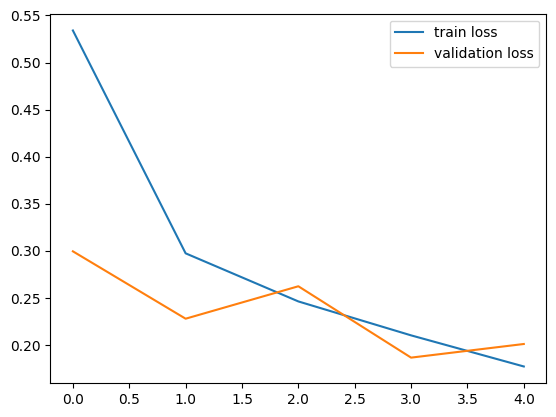

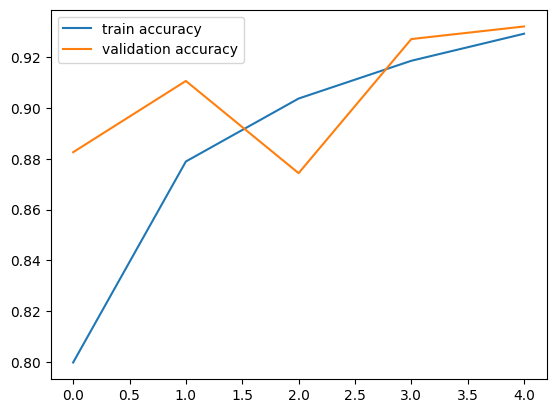

In [50]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

# Read image
input_image = cv2.imread(input_image_path)


input_image = (cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.imshow(input_image)
plt.axis('off')
plt.show()

# Preprocess
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255.0

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

#Prediction
input_prediction = model.predict(input_image_reshaped)

print("Prediction probabilities:", input_prediction)


# Get class label
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:
    
  print('The person in the image is not wearing a mask')